## making our own class

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [12]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

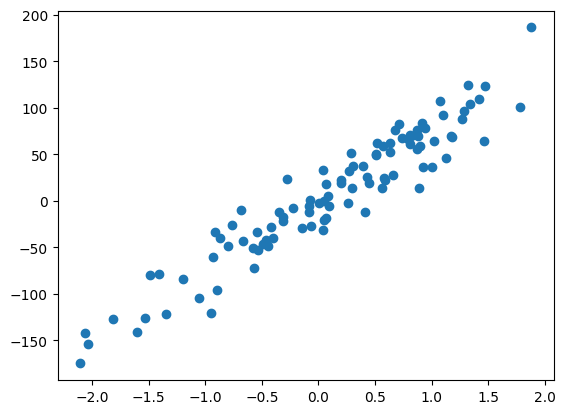

In [13]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [14]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[73.62074606]
-1.189588145271399


In [ ]:
m = 73.62 # see above the value and put it #lets take this constant first

In [20]:
class GDRegressor:

    def __init__(self, learning_rate, epochs): #constructor
        self.m = 73.62 # taking it constant
        self.b = -120   #starting from a  random value of b
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        #calculate the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope, self.b)
        
        print(self.b)

In [21]:
gd = GDRegressor(0.1, 10) # the learning rate is too high so the value is coming wrong...
gd.fit(X, y)

-23762.099752872324 2256.2099752872323
451479.8953045741 -42891.779555170186
-8578118.01078691 814920.0215235208
162984242.20495126 -15483504.198971607
-3096700601.894074 294186555.9904358
58837311435.987404 -5589544587.608305
-1117908917283.7607 106201347140.76778
21240269428391.457 -2017825595698.378
-403565119139437.6 38338686318245.39
7667737263649316.0 -728435040046686.2
-728435040046686.2


In [22]:
gd = GDRegressor(0.01, 10)
gd.fit(X,y)

-23762.099752872324 117.62099752872325
23762.099752872324 -120.0
-23762.099752872324 117.62099752872325
23762.099752872324 -120.0
-23762.099752872324 117.62099752872325
23762.099752872324 -120.0
-23762.099752872324 117.62099752872325
23762.099752872324 -120.0
-23762.099752872324 117.62099752872325
23762.099752872324 -120.0
-120.0


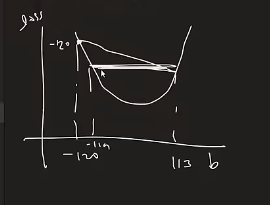

In [23]:
gd = GDRegressor(0.001, 100)
gd.fit(X,y)

-23762.099752872324 -96.23790024712767
-19009.679802297855 -77.22822044482982
-15207.743841838284 -62.02047660299153
-12166.195073470626 -49.854281529520904
-9732.9560587765 -40.1213254707444
-7786.364847021204 -32.3349606237232
-6229.091877616962 -26.105868746106236
-4983.27350209357 -21.122595244012665
-3986.618801674855 -17.13597644233781
-3189.2950413398844 -13.946681400997926
-2551.436033071908 -11.39524536792602
-2041.148826457527 -9.354096541468493
-1632.9190611660215 -7.7211774803024715
-1306.3352489328172 -6.414842231369654
-1045.0681991462534 -5.3697740322234
-836.0545593170029 -4.533719472906397
-668.8436474536023 -3.8648758254527946
-535.0749179628817 -3.329800907489913
-428.05993437030526 -2.9017409731196078
-342.4479474962444 -2.5592930256233632
-273.9583579969951 -2.285334667626368
-219.16668639759644 -2.0661679812287717
-175.33334911807717 -1.8908346321106946
-140.26667929446182 -1.7505679528162328
-112.21334343556948 -1.6383546093806634
-89.7706747484553 -1.54858393463

### when to stop when the graph is starting to get flat stop at that epochs no need to run more..
 
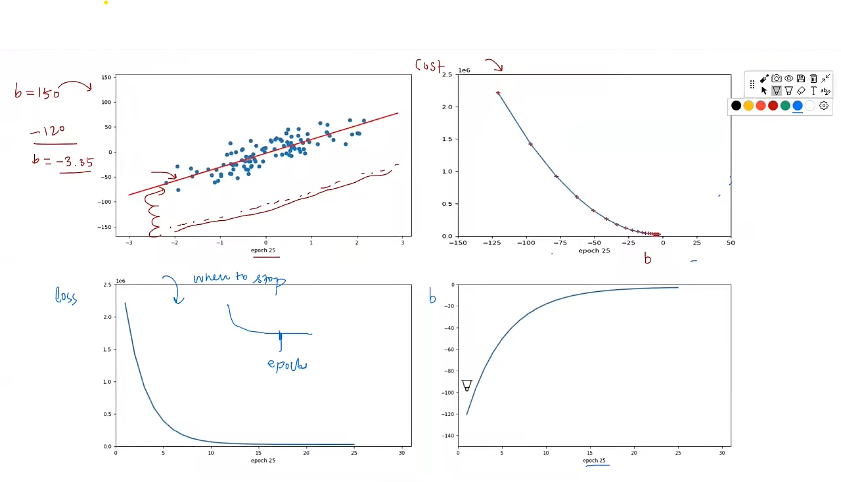

### while working of gradient descent chose an appropriate learning rate
* if learning rate is too small then you need very large epochs to get there which means large number of calculation and slower algorithm

* if learning rate is right then ull reach at less epoches and faster algorithm
* if learning rate is too large then ull never reach there and jump to high

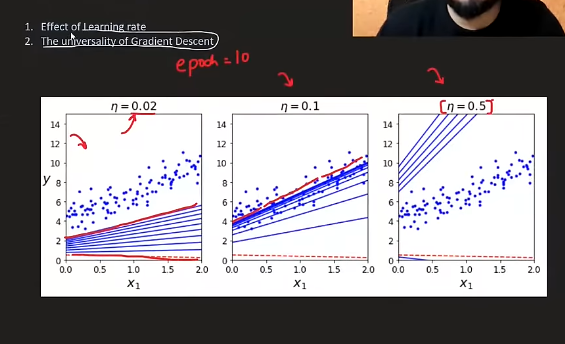

## till now we where just assumming m constant and finding b that is working with just one varible to perform gradient descent

### adding m into the mix 
* steps:-
* initialize random values for m and b
* epochs = 100, lr(learning rate ) = 0.01
*    for i in epochs:
*        b = b - n*slope 
*        m = m - n*slope
        
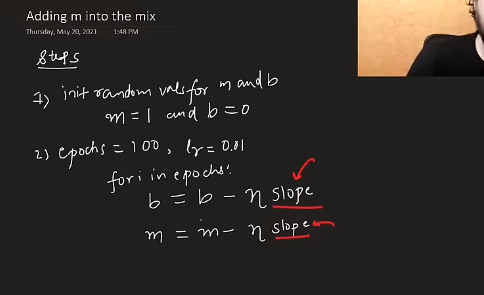

* earliear lossfunction was depending on one variable that is b
* so the loss function was a parabola and we were suppose to find the value of b such that the loss function is minimum at that value of b..
* only two axis L and b now what if m is also there...
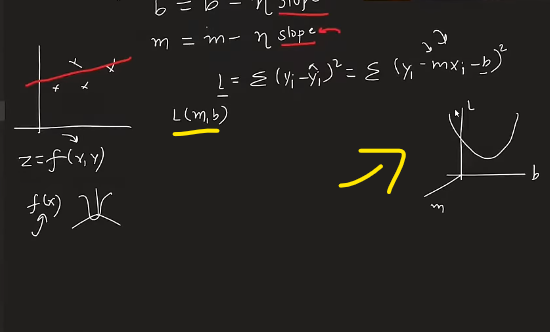


* but now the loss fucntion is depending on two variable b and m
* so the graph will now not be a parabola but a third axis and a 3d parabola

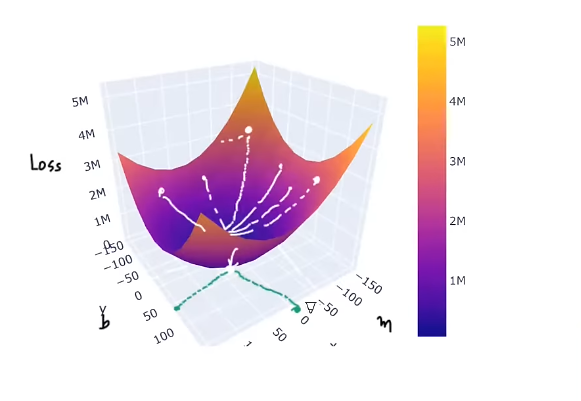

* now we need to calculate the value of m and b such that the loss function is minimum 
* for that we need to slowly reach at the bottom of the graph

### partial differentiation w.r.t m and b of the lossfunction to get the slope 

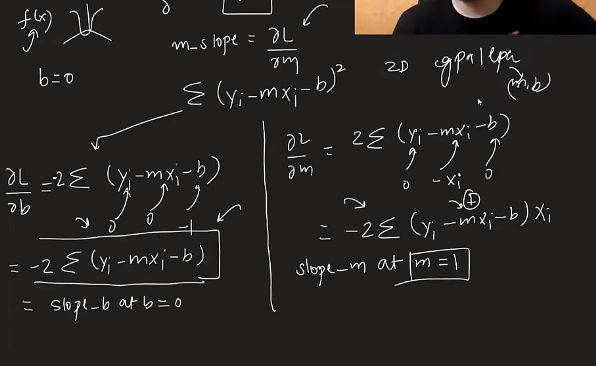

* note this is only for two variable but to apply it in multiple linear regression or for multiple features we see it in SGD regression...

In [24]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [25]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

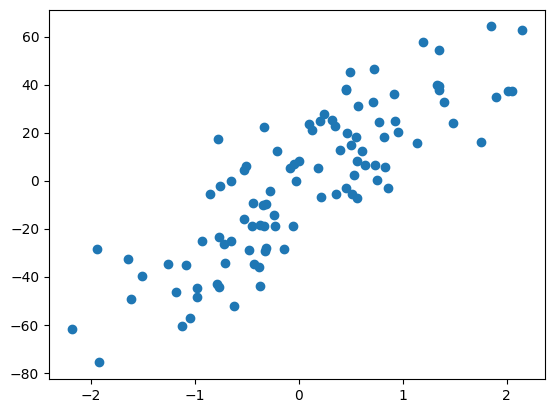

In [26]:
plt.scatter(X,y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [41]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6345158782661012

In [42]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 100 #(randomly take any value...)
        self.b = -120 #(randomly take any value...)
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - (self.m * X.ravel()) - self.b) # you can simply write X , X.ravel just make sure its in single dimension  ..
            loss_slope_m = -2 * np.sum( (y - (self.m * X.ravel()) - self.b) * X.ravel() ) # w.r.t to m

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m, self.b)

    
    def predict(self, X):
        return self.m * X + self.b

In [43]:
gd = GDRegressor(0.001, 50)

In [44]:
gd.fit(X_train, y_train)

28.159367347119066 -2.3004574196824854


In [ ]:
gd.predict(X_test) 

array([[ 21.09732023],
       [ 18.02962184],
       [ 18.23238093],
       [ -8.13929374],
       [ 15.71827044],
       [ 58.2529665 ],
       [-15.07783741],
       [-11.37125581],
       [-15.85557195],
       [ -8.84542293],
       [-23.62986105],
       [ 14.77224759],
       [ 12.68984073],
       [-23.94450805],
       [-22.36092777],
       [-16.71707058],
       [ 24.53064978],
       [-17.03243073],
       [ -3.92053306],
       [-12.06068528]])

In [46]:
# to check if its working correctly or not lets calculate the r2 score

r2_score(y_test, gd.predict(X_test))

0.6343842836315579

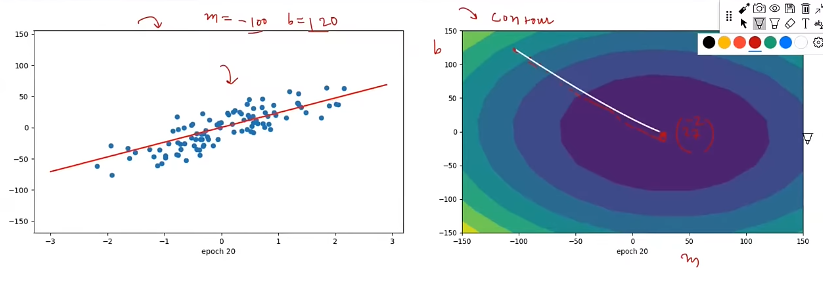

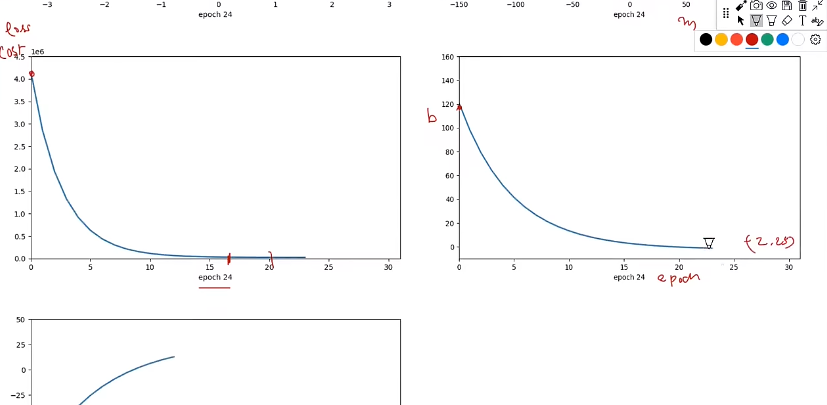

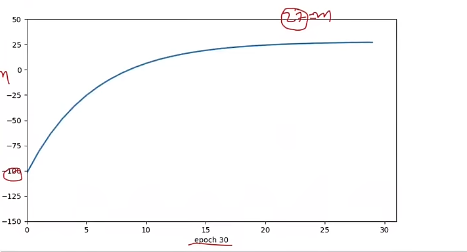

# important:-
### the things that effect the gradient descetn are:-
* Effect of learning rate:- how u chose the learning rate is very important as u know it helps the algorithm to work fast and reach the desire value at lower epochs

* Effect of Loss Function :- if you have a convex function ( draw a line between any two points it doesnt cross the function is called a convex function ) it has only one minima that is the global minima
* but in non-convex function there are more then one minima (local minima) and if u initialized near a local minima you may stuck their and get the wrong answer..

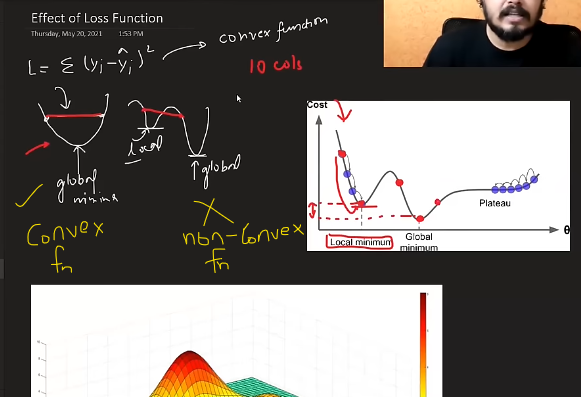

# convex function
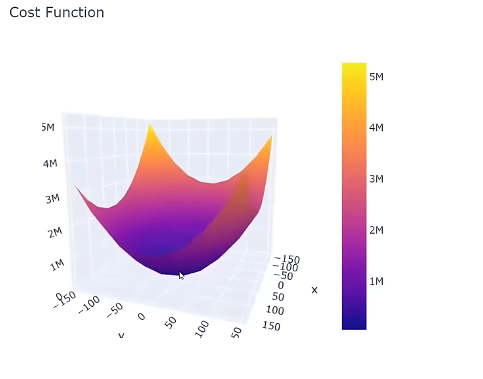

# non-convex function

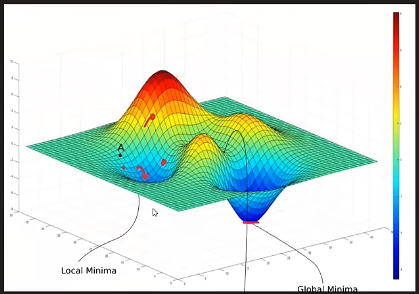

# sadal point
* it has a plateu from which it takes a lot of time to go down -> a large number of epochs it needed otherwise ull stuck there

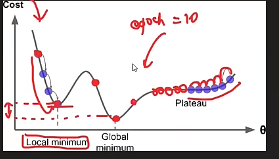

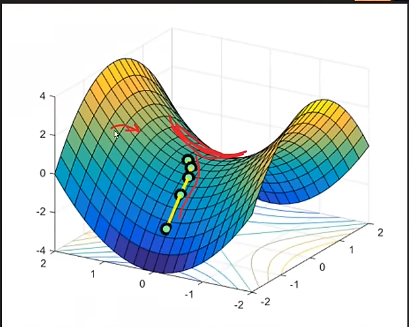

# Effect of data
* agar apke data me jo features hai (columns hai) agar vo bara bar scal me hote hai to apka plot circular hota hai and ull reach minima faster..
* but if the data is not scaled, lets say one feature is in tens and other is in lakhs then the graph will become flatish (not circular) then it will take larger time.. 
* we need to scale the data before performing the gradient descent other wise it will take a longer time to reach then as compare to a scaled data 
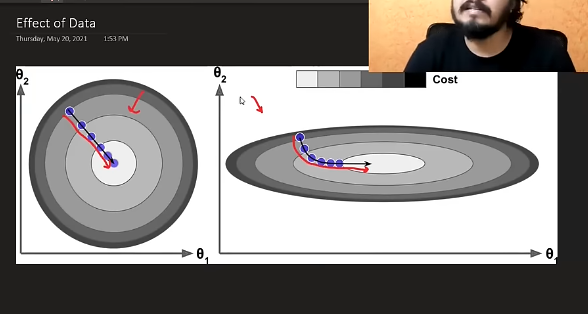